In [1]:
# Import the necessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset  and display the first few rows
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# get infomation about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Check if there are missing values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# check if there are duplicates in the dataset
iris.duplicated().sum()

3

In [6]:
# locating the duplicated rows
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [7]:
# verifying a duplicated row
iris[(iris['sepal_length']==5.8) & (iris['petal_length']==5.1)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
# Removing the duplicates detected
iris.drop_duplicates(inplace=True)

In [9]:
# checking if duplicates problem is solved
iris.duplicated().sum()

0

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [11]:
# Get descriptive statistics of the numeric columns in the dataset
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


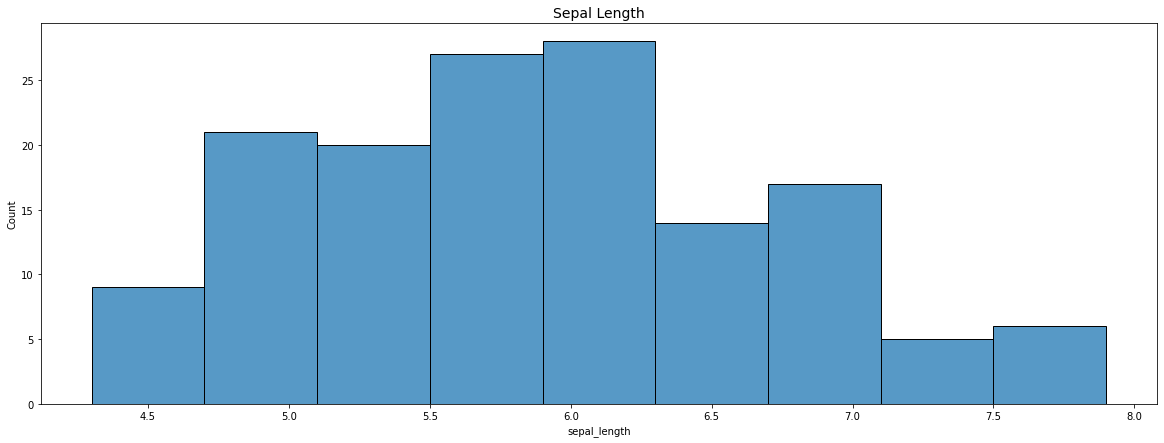

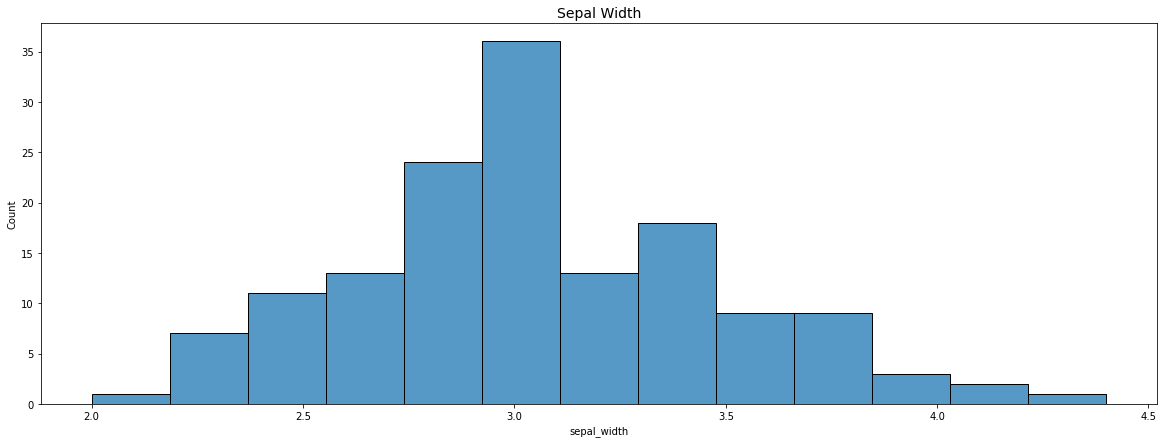

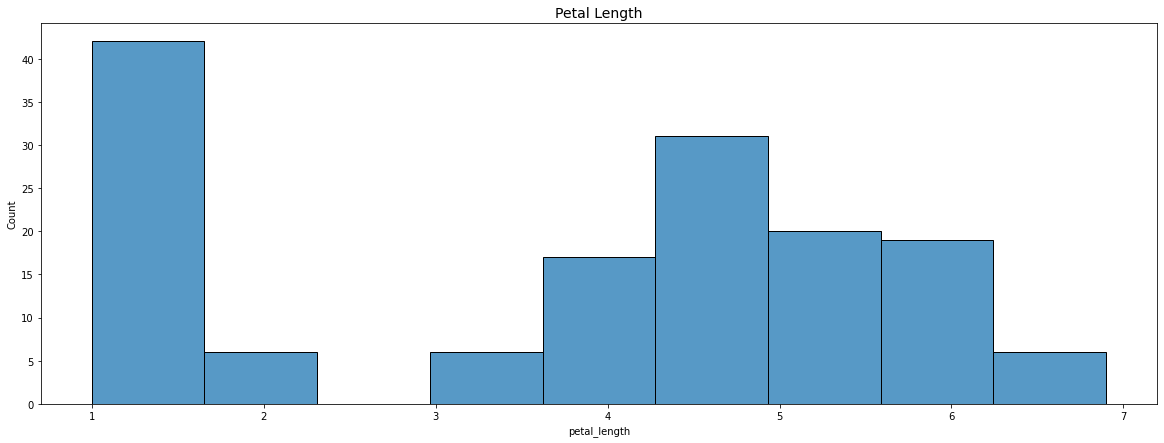

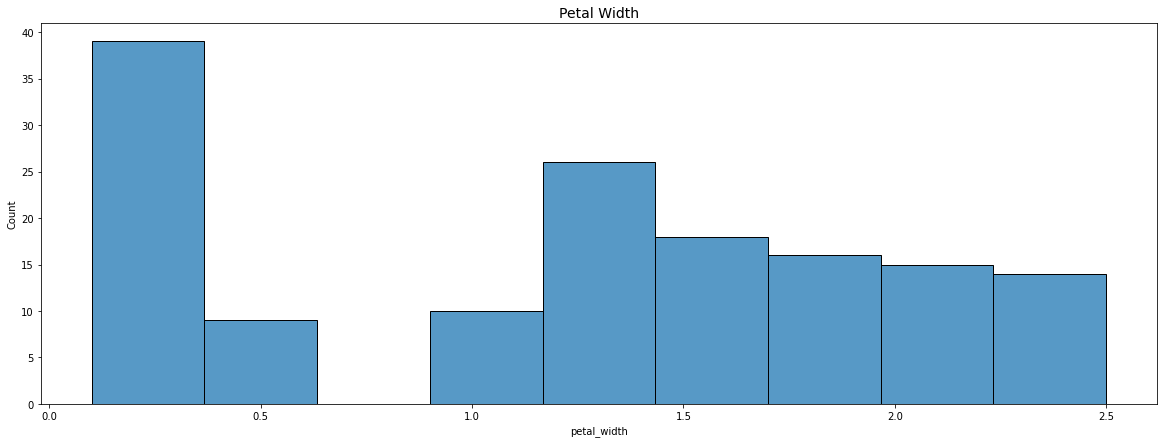

In [12]:
# select the numeric columns
# Plot histograms for each numeric column
num_col = iris.select_dtypes('number').columns

for col in num_col:
    plt.figure(figsize=(20,7))
    plt.title(f'{col}'.title().replace('_',' '),fontsize=14)
    sns.histplot(iris[col]);

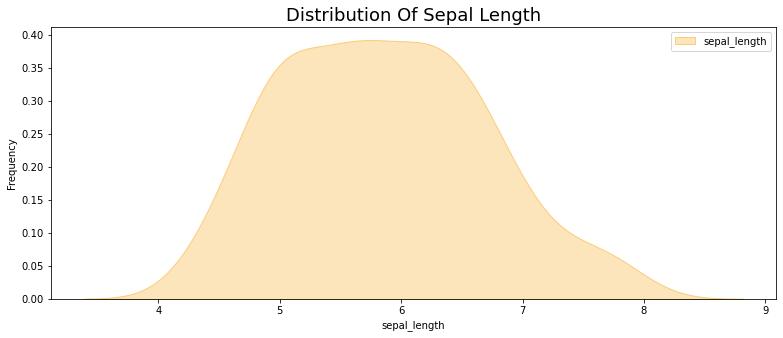

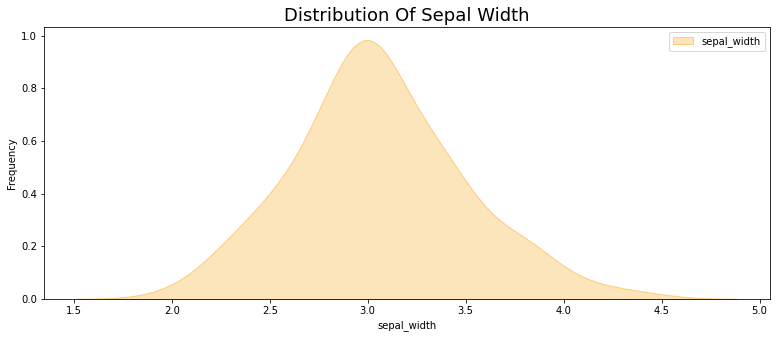

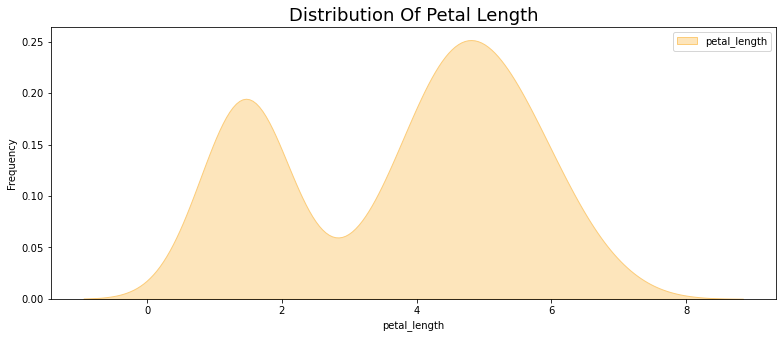

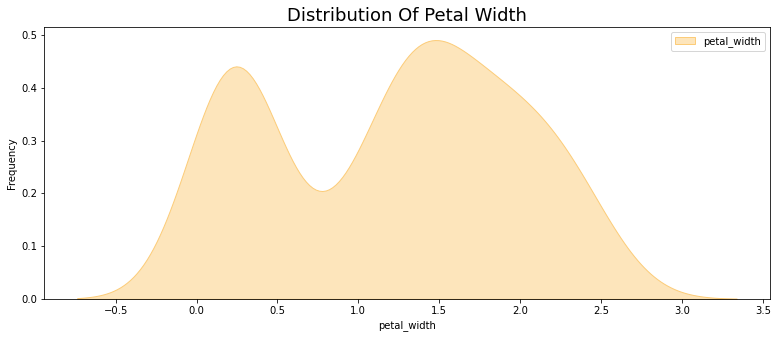

In [13]:
# Plot kernel density estimation (KDE) plots for each numeric column
for col in num_col:
    plt.subplots(figsize = (13,5))
    sns.kdeplot(iris[col], alpha=0.5,shade = True, color="#fccc79", label=f"{col}")
    plt.title(f'Distribution of {col}'.title().replace('_',' '), fontsize = 18)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.legend();

## sepals
this is bell-shaped hence a normal distriution and also symmetrical 

## petals
this are two bell-shaped bimodal distributions and each subgroup is symmetrical <br>
we could further investigate this subgroups 

In [14]:
iris.species.value_counts(normalize=True)

Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: species, dtype: float64

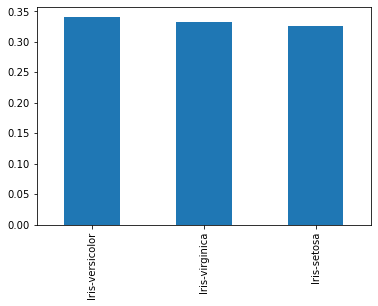

In [15]:
# Calculate and plot the relative frequency of each species in the dataset
iris.species.value_counts(normalize=True).plot(kind='bar');

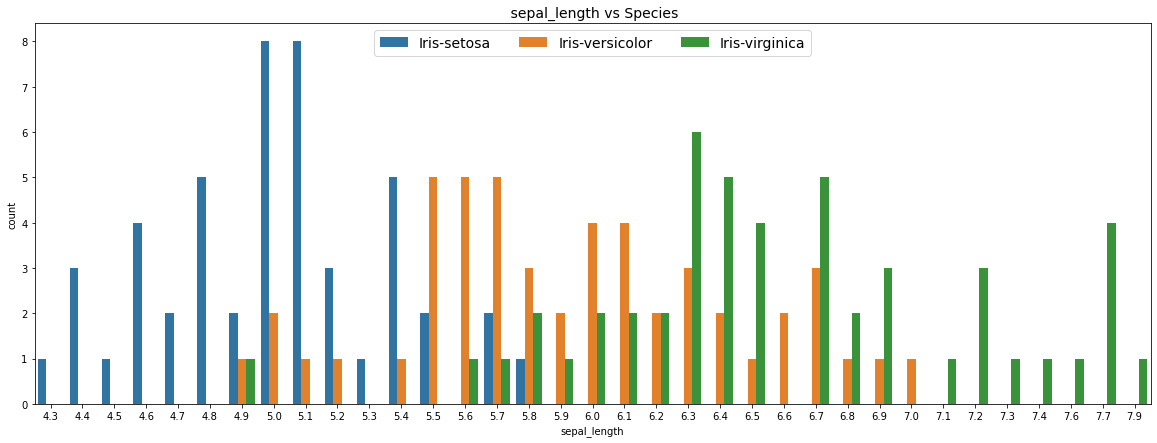

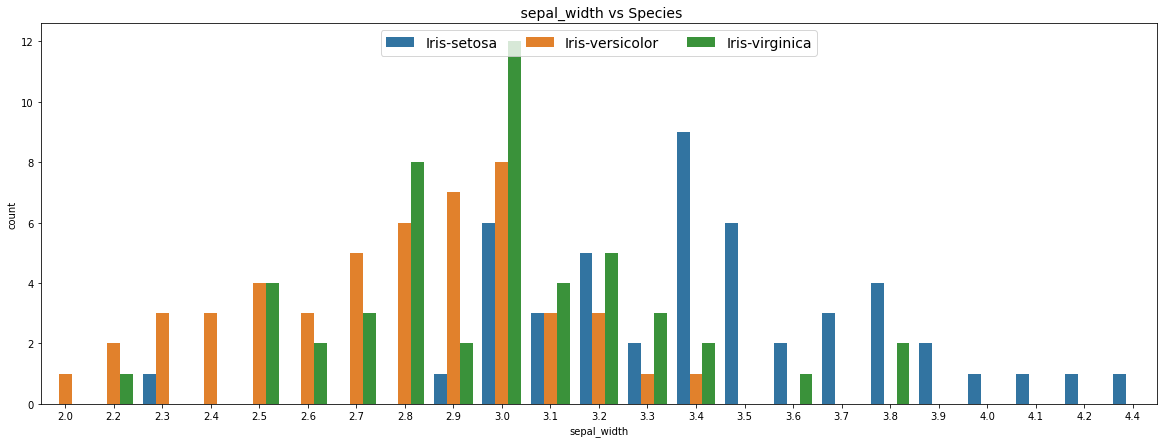

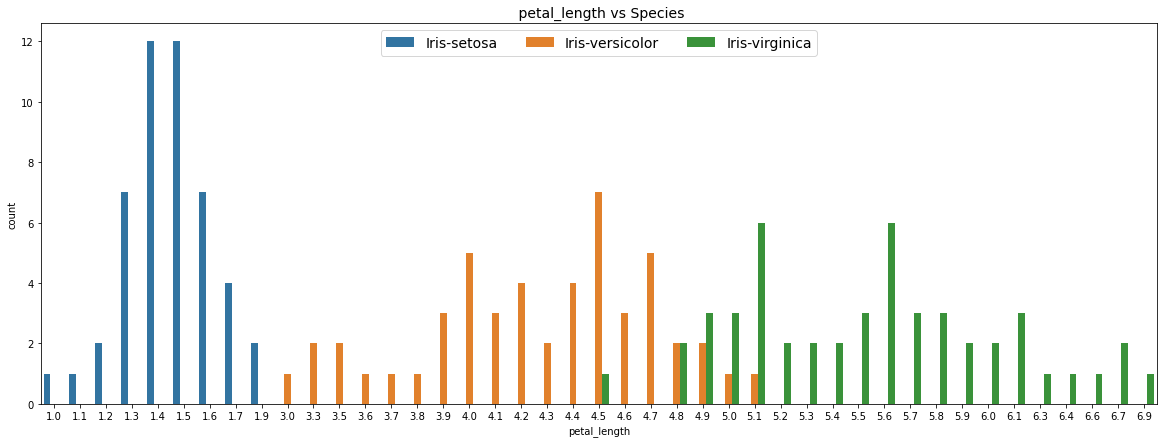

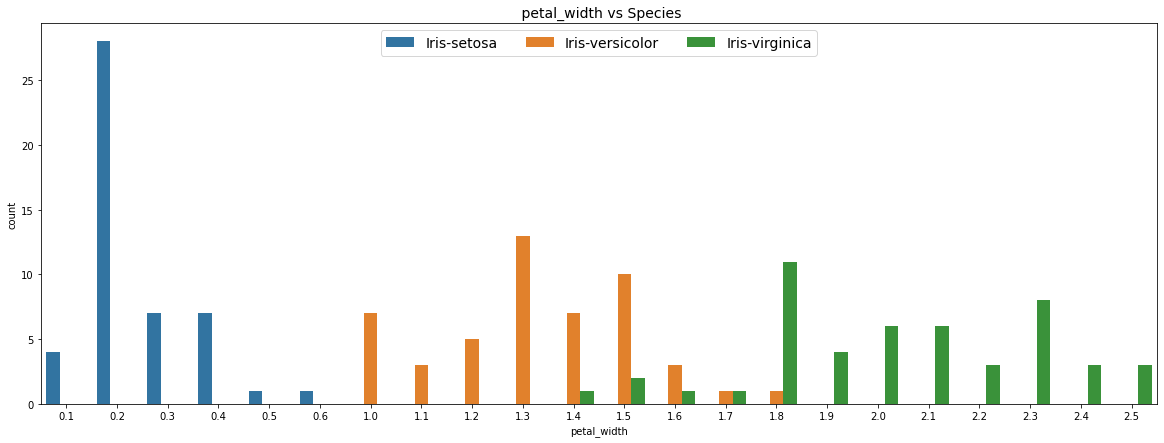

In [16]:
# Plot count plots for each numeric column grouped by species
num_col = iris.select_dtypes('number').columns
for col in num_col:
    plt.figure(figsize=(20,7))
    plt.title(f' {col} vs Species',fontsize=14)
    sns.countplot(data=iris,x=col,hue='species')
    plt.legend(loc='best',ncol=3,fontsize=14,title_fontsize=14);

## sepal length 
setosa has length mostly between 4.3 and 5.5 <br>
versicolor has length mostly between 4.9 and 6.9 <br>
verginica has length mostly between 5.7 and 7.9 <br>

## sepal width 
setosa has width mostly between 2.0 and 3.4 <br>
versicolor has width mostly between 2.5 and 3.5 <br> 
virginica also between 2.9 and 4.4 <br>


## petal length
setosa has length between 1.0 and 1.9 <br>
versicolor has length between 3.0 and 5.1 <br>
then virginica falls between 4.5 and 6.9<br>

## petal width 
all setosa has petal width below 0.6,<br>
 versicolor has petal width between 1.0 and 1.8 <br>
 then virginica is between 1.4 and 2.55.

In [17]:
iris.species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [18]:
# Separate the features (input variables) and target variable
features = iris.drop(columns='species')
target = iris.species

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2)

In [21]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
136,6.3,3.4,5.6,2.4
79,5.7,2.6,3.5,1.0
121,5.6,2.8,4.9,2.0
44,5.1,3.8,1.9,0.4
2,4.7,3.2,1.3,0.2
...,...,...,...,...
50,7.0,3.2,4.7,1.4
97,6.2,2.9,4.3,1.3
53,5.5,2.3,4.0,1.3
145,6.7,3.0,5.2,2.3


In [22]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
122,7.7,2.8,6.7,2.0
128,6.4,2.8,5.6,2.1
7,5.0,3.4,1.5,0.2
56,6.3,3.3,4.7,1.6
129,7.2,3.0,5.8,1.6
139,6.9,3.1,5.4,2.1
55,5.7,2.8,4.5,1.3
35,5.0,3.2,1.2,0.2
66,5.6,3.0,4.5,1.5


In [23]:
y_train

136     Iris-virginica
79     Iris-versicolor
121     Iris-virginica
44         Iris-setosa
2          Iris-setosa
            ...       
50     Iris-versicolor
97     Iris-versicolor
53     Iris-versicolor
145     Iris-virginica
63     Iris-versicolor
Name: species, Length: 117, dtype: object

In [24]:
y_test

147     Iris-virginica
122     Iris-virginica
128     Iris-virginica
7          Iris-setosa
56     Iris-versicolor
129     Iris-virginica
139     Iris-virginica
55     Iris-versicolor
35         Iris-setosa
66     Iris-versicolor
42         Iris-setosa
133     Iris-virginica
135     Iris-virginica
23         Iris-setosa
102     Iris-virginica
87     Iris-versicolor
43         Iris-setosa
24         Iris-setosa
48         Iris-setosa
91     Iris-versicolor
13         Iris-setosa
28         Iris-setosa
123     Iris-virginica
74     Iris-versicolor
1          Iris-setosa
0          Iris-setosa
76     Iris-versicolor
99     Iris-versicolor
27         Iris-setosa
113     Iris-virginica
Name: species, dtype: object

In [25]:
# Print the shapes of the training and testing sets
print(f'x_train is of shape {X_train.shape}')
print(f'x_test is of shape {X_test.shape}')
print(f'y_train is of shape {y_train.shape}')
print(f'y_test is of shape {y_test.shape}')

x_train is of shape (117, 4)
x_test is of shape (30, 4)
y_train is of shape (117,)
y_test is of shape (30,)


In [26]:
# Create a Logistic Regression model and fit it to the training data

from sklearn.linear_model import LogisticRegression

In [27]:
logreg = LogisticRegression(max_iter=1000)

In [28]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
# Calculate the accuracy score of the model on the training set
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_train,logreg.predict(X_train))

0.9658119658119658

In [31]:
# Calculate the accuracy score of the model on the test set
accuracy_score(y_test,logreg.predict(X_test))

0.9666666666666667

In [32]:
# Create a Decision Tree Classifier model and fit it to the training data
from sklearn.tree import DecisionTreeClassifier 

In [33]:
dt = DecisionTreeClassifier(max_depth=3)

In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
# Calculate the accuracy score of the model on the training set
accuracy_score(y_train,dt.predict(X_train))

0.9743589743589743

In [36]:
# Calculate the accuracy score of the model on the test set
accuracy_score(y_test,dt.predict(X_test))

0.9666666666666667

In [37]:
# Create a Random Forest Classifier model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier

In [38]:
rt = RandomForestClassifier()

In [39]:
rt.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
# Calculate the accuracy score of the model on the training set
accuracy_score(y_train,rt.predict(X_train))

1.0

In [41]:
# Calculate the accuracy score of the model on the test set
accuracy_score(y_test,rt.predict(X_test))

0.9333333333333333

In [42]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0
122,7.7,2.8,6.7,2.0


In [43]:
# a helper function to make predictions

def predict(model):
    '''
    a predict funtion, it accepts the model used as input 
    then goes on to request the sepal_length,sepal width,
    petal length and petal width from the user.
    This in turn returns the predictions for provided inputs
    '''
    
    sepal_length = float(input('Please enter the sepal length: '))
    sepal_width = float(input('Please enter the sepal length: '))
    petal_length = float(input('Please enter the sepal length: '))
    petal_width = float(input('Please enter the sepal length: '))
    data = pd.DataFrame({'sepal_length':[sepal_length],
                         'sepal_width':[sepal_width],'petal_length':[petal_length],
                         'petal_width':[petal_width]},index=None)
    preds = model.predict(data)
    
    return f'i am 90 percent sure its {preds[0]}'

In [44]:
predict(logreg)

Please enter the sepal length: 6.5
Please enter the sepal length: 3.0
Please enter the sepal length: 5.2
Please enter the sepal length: 2.0


'i am 90 percent sure its Iris-virginica'

In [45]:
predict(dt)

Please enter the sepal length: 7.7
Please enter the sepal length: 2.8
Please enter the sepal length: 6.7
Please enter the sepal length: 3.0


'i am 90 percent sure its Iris-virginica'